# Seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Categorical plot

### sns.barplot(): 棒グラフ

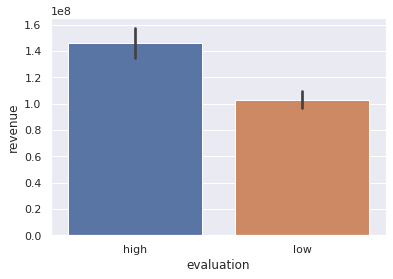

In [27]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

#x:カテゴリカルな項目
#y:値を算出するのに使う項目
#estimator:何を出すか(デフォルトは平均値)
#例：evaluationごとにrevenueの平均値の棒グラフをを出したい
sns.set()
sns.barplot(x='evaluation', y='revenue', data=df)

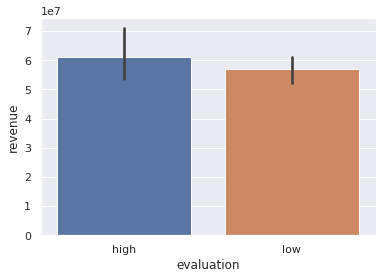

In [28]:
#中央値の棒グラフを出したい
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

### sns.countplot():レコードの数を表示する

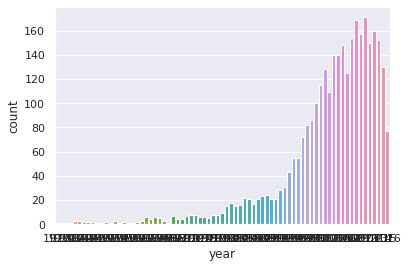

In [29]:
#西暦のカラムを作成（文字列）
df['year'] = df['release_date'].apply(lambda x: x[:4])

#西暦毎にcountplotする
sns.countplot(x='year', data=df)

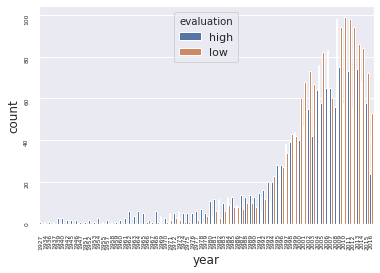

In [30]:
#戻り値はmatplotlibのaxesのオブジェクト
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

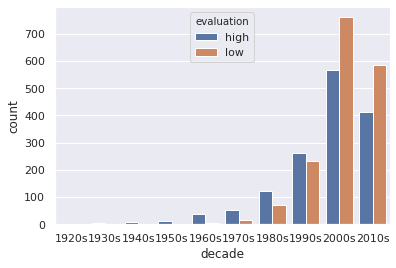

In [31]:
#見辛いので年代毎にまとめる
#年代カラムdecadeを作成
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

### sns.boxplot():箱ひげ図

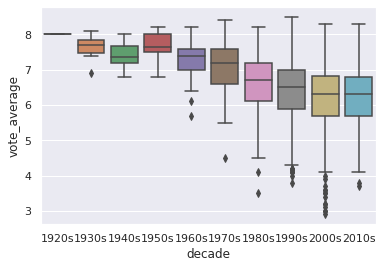

In [32]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.violinplot():バイオリンプロット

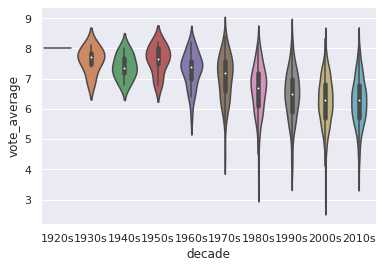

In [33]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

### sns.swarmplot()

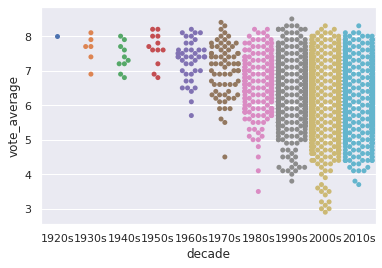

In [35]:
#boxplot, violinsplotは正規化されていて実際のデータ数はわからない
#実際のデータ数を見たい場合はswarmplotを使う
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

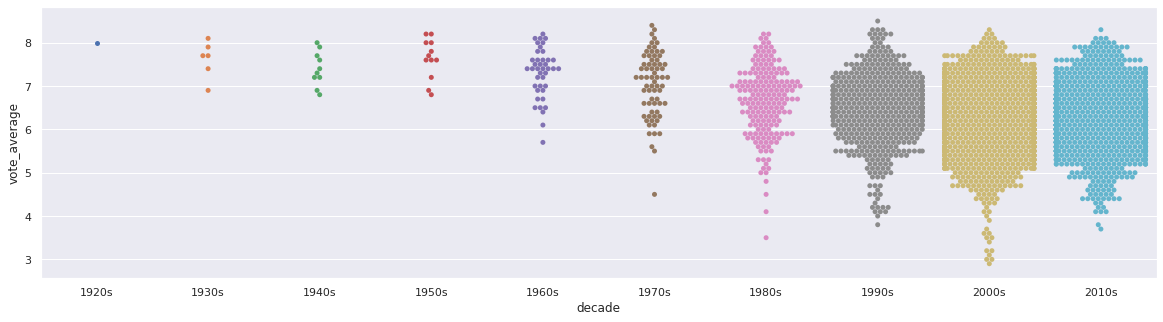

In [36]:
#グラフのサイズを変更する
fig, ax = plt.subplots(figsize=(20,5))
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))